## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [0]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Using TensorFlow backend.


4423680/4422102 [==============================] - 1s 0us/step


In [0]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
% matplotlib inline
import vis

from keras.models import Sequential
from keras import backend as K

### Find no.of samples are there in training and test datasets

In [0]:
x_train.shape

(60000, 28, 28)

In [0]:
x_test.shape

(10000, 28, 28)

### Find dimensions of an image in the dataset

In [0]:
x_train[0].shape

(28, 28)

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [0]:
y_train_class = keras.utils.to_categorical(y_train, 10)

In [0]:
y_test_class = keras.utils.to_categorical(y_test, 10)

### Normalize both the train and test image data from 0-255 to 0-1

In [0]:
x_train =  x_train.astype("float32") / 255

In [0]:
x_test = x_test.astype("float32") / 255

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:
x_train_conv = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test_conv = x_test.reshape(x_test.shape[0], 28, 28, 1)

### Import the necessary layers from keras to build the model

In [0]:
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping

### Build a model 

** with 2 Conv layers having `32 3*3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [0]:
model_conv = Sequential()
model_conv.add(Conv2D(32, (3, 3), activation ="relu", input_shape=(28, 28, 1)))
model_conv.add(Conv2D(32, (3, 3), activation ="relu"))
model_conv.add(Flatten())
model_conv.add(Dense(128, activation='relu'))
model_conv.add(Dense(10, activation='softmax'))

model_conv.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

es = [EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)]

output_conv = model_conv.fit(x_train_conv, y_train_class, batch_size=512, epochs=10, verbose=2,
                    validation_data=(x_test_conv, y_test_class),callbacks=es)


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 9s - loss: 0.5513 - acc: 0.8032 - val_loss: 0.4039 - val_acc: 0.8564
Epoch 2/10
 - 4s - loss: 0.3227 - acc: 0.8858 - val_loss: 0.3183 - val_acc: 0.8873
Epoch 3/10
 - 4s - loss: 0.2754 - acc: 0.9003 - val_loss: 0.3049 - val_acc: 0.8881
Epoch 4/10
 - 4s - loss: 0.2389 - acc: 0.9132 - val_loss: 0.2776 - val_acc: 0.8999
Epoch 5/10
 - 4s - loss: 0.2121 - acc: 0.9213 - val_loss: 0.2636 - val_acc: 0.9055
Epoch 6/10
 - 4s - loss: 0.1889 - acc: 0.9309 - val_loss: 0.2798 - val_acc: 0.8993
Epoch 7/10
 - 4s - loss: 0.1711 - acc: 0.9369 - val_loss: 0.2638 - val_acc: 0.9063
Epoch 8/10
 - 4s - loss: 0.1483 - acc: 0.9457 - val_loss: 0.2620 - val_acc: 0.9083
Epoch 9/10
 - 4s - loss: 0.1307 - acc: 0.9530 - val_loss: 0.2532 - val_acc: 0.9159
Epoch 10/10
 - 4s - loss: 0.1127 - acc: 0.9600 - val_loss: 0.2556 - val_acc: 0.9174


### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [0]:
model_conv_pool = Sequential()
model_conv_pool.add(Conv2D(32, (3, 3), activation ="relu", input_shape=(28, 28, 1)))
model_conv_pool.add(Conv2D(32, (3, 3), activation ="relu"))
model_conv_pool.add(MaxPooling2D(pool_size=(2, 2)))
model_conv_pool.add(Dropout(0.25))
model_conv_pool.add(Flatten())
model_conv_pool.add(Dense(128, activation='relu'))
model_conv_pool.add(Dense(10, activation='softmax'))

model_conv_pool.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

es = [EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)]

output_conv = model_conv_pool.fit(x_train_conv, y_train_class, batch_size=512, epochs=10, verbose=2,
                    validation_data=(x_test_conv, y_test_class),callbacks=es)


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 4s - loss: 0.6017 - acc: 0.7921 - val_loss: 0.4088 - val_acc: 0.8533
Epoch 2/10
 - 4s - loss: 0.3542 - acc: 0.8748 - val_loss: 0.3763 - val_acc: 0.8615
Epoch 3/10
 - 4s - loss: 0.3094 - acc: 0.8891 - val_loss: 0.3036 - val_acc: 0.8906
Epoch 4/10
 - 4s - loss: 0.2793 - acc: 0.8985 - val_loss: 0.2869 - val_acc: 0.8966
Epoch 5/10
 - 4s - loss: 0.2549 - acc: 0.9067 - val_loss: 0.2940 - val_acc: 0.8877
Epoch 6/10
 - 4s - loss: 0.2377 - acc: 0.9120 - val_loss: 0.2670 - val_acc: 0.9029
Epoch 7/10
 - 4s - loss: 0.2234 - acc: 0.9193 - val_loss: 0.2654 - val_acc: 0.9025
Epoch 8/10
 - 4s - loss: 0.2070 - acc: 0.9234 - val_loss: 0.2391 - val_acc: 0.9129
Epoch 9/10
 - 4s - loss: 0.1937 - acc: 0.9286 - val_loss: 0.2393 - val_acc: 0.9131
Epoch 10/10
 - 4s - loss: 0.1835 - acc: 0.9330 - val_loss: 0.2347 - val_acc: 0.9182


### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# this will do preprocessing and realtime data augmentation
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    rotation_range=25,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

In [0]:
# Set up the generator
datagen.fit(x_train_conv)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

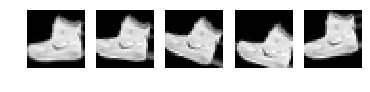

In [0]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train_conv[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [0]:
# fits the model on batches with real-time data augmentation:
history = model_conv_pool.fit_generator(datagen.flow(x_train_conv, y_train_class, batch_size=32), 
                             validation_data=(x_test_conv, y_test_class), use_multiprocessing=True,
                     steps_per_epoch=len(x_train_conv) / 32, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.5346 - acc: 0.7980 - val_loss: 0.3612 - val_acc: 0.8697
Epoch 2/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.4238 - acc: 0.8416 - val_loss: 0.3343 - val_acc: 0.8762
Epoch 3/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.3895 - acc: 0.8547 - val_loss: 0.3516 - val_acc: 0.8694
Epoch 4/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.3678 - acc: 0.8625 - val_loss: 0.2966 - val_acc: 0.8927
Epoch 5/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.3490 - acc: 0.8706 - val_loss: 0.2882 - val_acc: 0.8970
Epoch 6/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.3389 - acc: 0.8731 - val_loss: 0.2958 - val_acc: 0.8922
Epoch 7/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.3287 - acc: 0.8770 - val_loss: 0.2874 - val_acc: 0.8959
Epoch 8/10
1875/1875 [==========================

**Report the final train and validation accuracy**

In [0]:
score_val = model_conv_pool.evaluate(x_test_conv, y_test_class, verbose=1)

10000/10000 [==============================] - 1s 89us/step


In [0]:
print('Test loss:', score_val[0])
print('Test accuracy:', score_val[1])

Test loss: 0.2822566977977753
Test accuracy: 0.8999


In [0]:
score_train = model_conv_pool.evaluate(x_train_conv, y_train_class, verbose=1)

60000/60000 [==============================] - 5s 86us/step


In [0]:
print('Train loss:', score_train[0])
print('Train accuracy:', score_train[1])

Train loss: 0.24976347782214484
Train accuracy: 0.9071833333333333


## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

### **Load CIFAR10 dataset**

In [0]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 17s 0us/step


In [0]:
x_train.shape

(50000, 32, 32, 3)

In [0]:
x_test.shape

(10000, 32, 32, 3)

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# this will do preprocessing and realtime data augmentation
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    rotation_range=60,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=True)  # randomly flip images

### **Prepare/fit the generator.**

In [0]:
# Set up the generator
datagen.fit(x_train)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

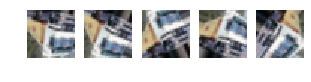

In [0]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[1:2], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,6,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze().astype(np.uint8))
    plt.plot()
plt.show()